# placa circular

This is the Laplace equation in 2-D cartesian coordinates (for heat equation)

$$ \frac{\partial^2 T}{\partial^2 x}+\frac{\partial^2 T}{\partial^2 y}=0 $$

Where T is temperature, x is x-dimension, and y is y-dimension. x and y are functions of position in Cartesian coordinates.

Here, we only need to solve 2-D form of the Laplace equation. The problem to solve is shown below:

La ecuación de laplace discretizada queda de la siguiente forma:

$$
T(x,y)=\frac{T(x+1,y) + T(x+1,y) + T(x,y+1) + T(x,y+1)}{4}
$$

importamos las librerias que vamos a necesitar

In [15]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

creamos dos funciones para pintar el cicrculo

In [2]:
# necesitamos una funcion que pinte (rellene de 1's las posiciones de la matriz)
# array es la array 2D que debemos rellenar de 1's segÃºn la figura de un circulo
def pinta(array,listaCoordenadasX,listaCantidadDeCeldasYAPintar): 

    centerY = int((len(array)-1)/2)

    for x,cantidadCeldasYAPintar in zip(listaCoordenadasX,listaCantidadDeCeldasYAPintar):
        r = range(0,int(cantidadCeldasYAPintar) + 1,1)
        for celda in r:
            #por lo de +- de la solucion
            array[centerY+celda][x] = 100
            array[centerY-celda][x] = 100


def circleMask(rad,radOffset):

    #pasamos el radio a entero
    radAsInt =int(round(float(rad),1))
    #damos un offset al radio para ver bien el circulo en la array bidimensional
    radOffsetAsInt =int(round(float(radOffset),1))
    #obtenemos el centro de la matriz (en X. En Y es igual, pero aqui no lo necesitamos)
    centerX = radAsInt + radOffsetAsInt   

    # En base a lo anterior calculamos el diametro del circulo
    # hacemos el diametro del circulo un numero impar para conseguir simetria
    # con respecto asl centro de la matriz
    d = radAsInt*2+1
    dOffset = radOffsetAsInt*2

    #devuelve matriz de 0's
    mask = np.zeros((d+dOffset,d+dOffset),np.uint8) 

    #En este for calculamos, haciendo un barrido en x el valor que debe tomar y.
    #Todo en base a la formula de un circulo (radAsInt+0.5)**2 = x**2 + y**2 centrado en 0,0
    #El valor de +-y se interpreta como la cantidad de celdas de la matriz que deben ser pintadas para
    #cada valor de x.

    listaCoordenadasX = list()
    listaCantidadDeCeldasAPintar = list()

    #rango para la obtencion de las x para el barrido
    r = range(-(radAsInt),(radAsInt)+1,1)

    for x in r:

        #y = +-math.sqrt((radAsInt+0.5)**2 - x**2 + y**2)
        y = math.sqrt(((radAsInt)**2)-(x**2))
        #correccion del centro en X a nuestro sistema matricial 
        xbis = centerX+x
        listaCoordenadasX.append(xbis)
        listaCantidadDeCeldasAPintar.append(y)

    #poblamos la array 2D para cada valor de xbis con el valor de y obtenido
    pinta(mask,listaCoordenadasX,listaCantidadDeCeldasAPintar)


    return mask

definimos el radio del circulo la distancia a la margen

In [12]:
radius = 20
radiusOffset = 1

hacemos la matriz que nos va a representar la condición de frontera

In [30]:
V=circleMask(radius,radiusOffset)
Vr=np.zeros(np.shape(V))
Ttiempo=np.zeros((np.shape(V)[0],np.shape(V)[1],1))
for i in range(1,2*radius+2):
    for j in range(1,2*radius+2):
        if (V[i,j-1]!=0 and V[i,j+1]!=0 and V[i-1,j]!=0 and V[i+1,j]!=0):
            Vr[i,j]=-90
V=V+Vr

se calcula la solución al problema

In [31]:
target = 1e-3  # Target accuracy

# Iteration (We assume that the iteration is convergence in maxIter = 500)
cont=0
error=1
diff=np.zeros(np.shape(V))
print("espere un momento calculando solución")
V = np.expand_dims(V, axis=2)
while error>target:
    Vcopy=np.copy(V)
    for i in range(1,2*radius+2):
        for j in range(1,2*radius+2):
            if(Vr[i,j]==-90):
                    V[i,j]=0.25*(V[i+1][j] + V[i-1][j] + V[i][j+1] + V[i][j-1])
                    
    for i in range(1,2*radius+2):
        for j in range(1,2*radius+2):
            if(Vr[i,j]==-90):
                diff[i,j]=np.abs(Vcopy[i,j]-V[i,j])
                    
    percentage=cont/917*100
    print("Completado:{} %".format(round(percentage,2)), end='\r')
    error=np.max(diff)
    cont+=1
    Ttiempo = np.append(Ttiempo,V, axis=2)
print("solución terminada")
print("el numero de interacciones fueron:",cont)

espere un momento calculando solución
solución terminada
el numero de interacciones fueron: 917


In [6]:
colorinterpolation = 100
colourMap = plt.cm.jet

# Set meshgrid
X, Y = np.meshgrid(np.arange(0, np.shape(V)[0]), np.arange(0, np.shape(V)[0]))

In [ ]:
%matplotlib inline

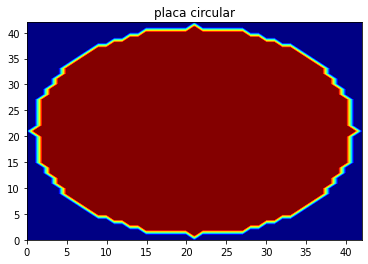

In [9]:
plt.title("placa circular")
plt.contourf(Y,X,Ttiempo[:,:,cont].T, colorinterpolation, cmap=colourMap)

simulamos el paso a paso de las iteracciones de la ecuación de laplace

In [ ]:
# acelerar simulación
tam=int((cont+1)*0.1)
Ttimpoac=np.zeros(((np.shape(V)[0],np.shape(V)[0],tam)))
for i in range(0,tam):
    Ttimpoac[:,:,i]=Ttiempo[:,:,i*int((cont+1)/tam)]

In [ ]:
%matplotlib

In [ ]:
#simulación
fig3=plt.figure()
ax=fig3.gca()
def puntoapunto(i):
    ax.clear()
    plt.title("placa circular")
    plt.contourf(Y,X,Ttimpoac[:,:,i].T, colorinterpolation, cmap=colourMap)
ani=animation.FuncAnimation(fig3, puntoapunto, range(tam))
# ani.save("Gradiente_de_laplaca_circular.mp4", writer="ffmpeg")
plt.show()

# Versiones de libreririas Utilizadas para la construcción del notebook

In [32]:
%load_ext version_information

%version_information numpy, scipy, matplotlib, sympy, version_information

Software versions
Python 3.9.12 64bit [MSC v.1916 64 bit (AMD64)]
IPython 7.30.0
OS Windows 10 10.0.19044 SP0
numpy 1.20.3
scipy 1.7.3
matplotlib 3.4.0
sympy 1.9
version_information 1.0.4
Sun Oct 09 22:58:20 2022 Hora est. Pacífico, Sudamérica